In [19]:
# 📦 Imports
import os
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import pickle

# 📁 Emotion code mapping
def emotion_finder(file_name):
    emotion = {
        "01": "neutral",
        "02": "calm",
        "03": "happy",
        "04": "sad",
        "05": "angry",
        "06": "fearful",
        "07": "disgust",
        "08": "surprised"
    }
    index = file_name.split("-")[2]
    return emotion.get(index, "unknown")



In [20]:
# 📂 Data loading
folders = [
    '/Users/yathamlohithreddy/Desktop/vscodefloder/marsproject/Audio_Speech_Actors_01-24',
    '/Users/yathamlohithreddy/Desktop/vscodefloder/marsproject/Audio_Song_Actors_01-24'
]

emotions_list = []
file_names = []

for pre in folders:
    for actor_name in os.listdir(pre):
        actor_path = os.path.join(pre, actor_name)
        if not os.path.isdir(actor_path):
            continue
        for filename in os.listdir(actor_path):
            if filename.endswith(".wav"):
                full_path = os.path.join(actor_path, filename)
                emotion = emotion_finder(filename)
                if emotion != "unknown":  # Only keep known emotions
                    file_names.append(full_path)
                    emotions_list.append(emotion)


Original Emotion Counts:
 emotion
angry        376
fearful      376
sad          376
happy        376
calm         376
disgust      192
surprised    192
neutral      188
Name: count, dtype: int64


<Axes: xlabel='emotion', ylabel='count'>

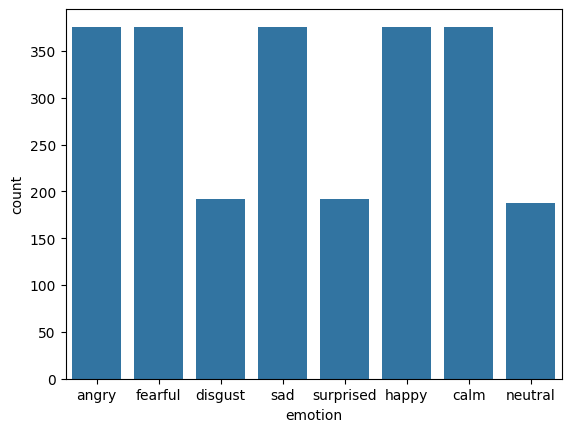

In [21]:
# 📊 Check distribution
df = pd.DataFrame({"file_path": file_names, "emotion": emotions_list})
print("Original Emotion Counts:\n", df["emotion"].value_counts())
sns.countplot(x="emotion", data=df)

✅ Found 1440 files in /Users/yathamlohithreddy/Desktop/vscodefloder/marsproject/Audio_Speech_Actors_01-24
✅ Found 1012 files in /Users/yathamlohithreddy/Desktop/vscodefloder/marsproject/Audio_Song_Actors_01-24

🎧 Total valid .wav files collected: 2452

✅ Sample of computed features:
   emotion       zcr  log_power
0    angry  0.074035 -66.679962
1  fearful  0.070726 -67.912857
2  fearful  0.117620 -68.326912
3    angry  0.070798 -68.238258
4  disgust  0.062740 -65.760513


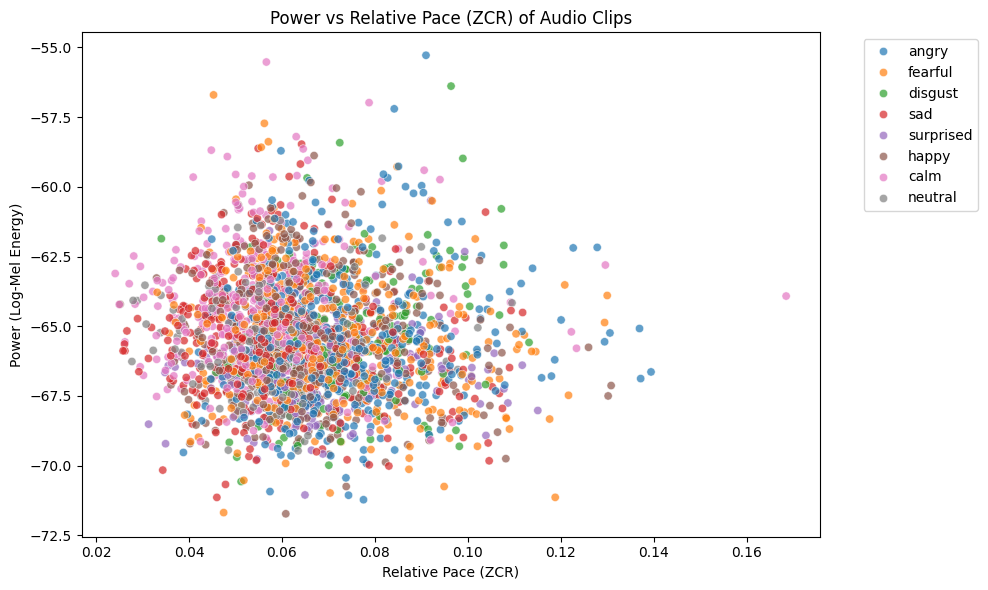

In [31]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Folders containing WAV files in subdirectories


# 2. Emotion mapping from file code
emotion_finder = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

file_paths = []
emotions_list = []

# 3. Recursively collect all .wav files and extract labels
for folder in folders:
    wav_files = glob.glob(os.path.join(folder, '**', '*.wav'), recursive=True)
    print(f"✅ Found {len(wav_files)} files in {folder}")
    
    for path in wav_files:
        filename = os.path.basename(path)
        parts = filename.split("-")
        if len(parts) > 2:
            emotion_code = parts[2]
            label = emotion_finder.get(emotion_code)
            if label:
                file_paths.append(path)
                emotions_list.append(label)

print(f"\n🎧 Total valid .wav files collected: {len(file_paths)}")

# 4. Extract ZCR + Power (log-mel energy)
power_pace_data = []

for path, label in zip(file_paths, emotions_list):
    try:
        y, sr = librosa.load(path, sr=None)
        zcr = librosa.feature.zero_crossing_rate(y).mean()
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        log_power = librosa.power_to_db(S, ref=np.max).mean()
        power_pace_data.append((label, zcr, log_power))
    except Exception as e:
        print(f"❌ Error in {path}: {e}")

# 5. Convert to DataFrame and plot
df_pp = pd.DataFrame(power_pace_data, columns=['emotion', 'zcr', 'log_power'])

print("\n✅ Sample of computed features:")
print(df_pp.head())

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pp, x='zcr', y='log_power', hue='emotion', palette='tab10', alpha=0.7)
plt.title('Power vs Relative Pace (ZCR) of Audio Clips')
plt.xlabel('Relative Pace (ZCR)')
plt.ylabel('Power (Log-Mel Energy)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


✅ Found 1440 files in /Users/yathamlohithreddy/Desktop/vscodefloder/marsproject/Audio_Speech_Actors_01-24
✅ Found 1012 files in /Users/yathamlohithreddy/Desktop/vscodefloder/marsproject/Audio_Song_Actors_01-24

🎧 Total valid audio files: 2452

✅ Sample energy data:
   emotion       rms
0    angry  0.011657
1  fearful  0.008692
2  fearful  0.038229
3    angry  0.023400
4  disgust  0.004161


/var/folders/g6/pn8l9d616gl87vwf5lxtp0nr0000gn/T/ipykernel_92756/1601357509.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_energy, x='emotion', y='rms', palette='Set3')


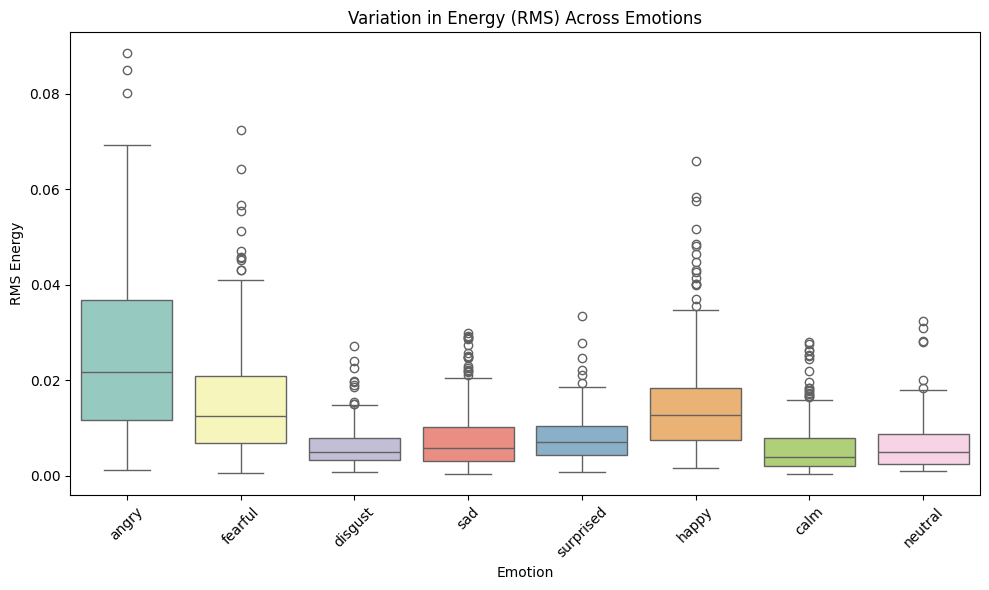

In [32]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Folder paths
folders = [
    '/Users/yathamlohithreddy/Desktop/vscodefloder/marsproject/Audio_Speech_Actors_01-24',
    '/Users/yathamlohithreddy/Desktop/vscodefloder/marsproject/Audio_Song_Actors_01-24'
]

# Emotion code-to-label map
emotion_finder = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

file_paths = []
emotions_list = []

# Recursively gather all .wav files and emotions
for folder in folders:
    wav_files = glob.glob(os.path.join(folder, '**', '*.wav'), recursive=True)
    print(f"✅ Found {len(wav_files)} files in {folder}")
    
    for path in wav_files:
        filename = os.path.basename(path)
        parts = filename.split("-")
        if len(parts) > 2:
            emotion_code = parts[2]
            label = emotion_finder.get(emotion_code)
            if label:
                file_paths.append(path)
                emotions_list.append(label)

print(f"\n🎧 Total valid audio files: {len(file_paths)}")

# === Extract RMS Energy ===
energy_data = []

for path, label in zip(file_paths, emotions_list):
    try:
        y, sr = librosa.load(path, sr=None)
        rms = librosa.feature.rms(y=y).mean()
        energy_data.append((label, rms))
    except Exception as e:
        print(f"❌ Error in {path}: {e}")

# Create DataFrame
df_energy = pd.DataFrame(energy_data, columns=['emotion', 'rms'])

print("\n✅ Sample energy data:")
print(df_energy.head())

# === Plot: Energy Variation Across Emotions ===
plt.figure(figsize=(10,6))
sns.boxplot(data=df_energy, x='emotion', y='rms', palette='Set3')
plt.title('Variation in Energy (RMS) Across Emotions')
plt.xlabel('Emotion')
plt.ylabel('RMS Energy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/g6/pn8l9d616gl87vwf5lxtp0nr0000gn/T/ipykernel_92756/4277293665.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pitch, x='emotion', y='pitch', palette='coolwarm')


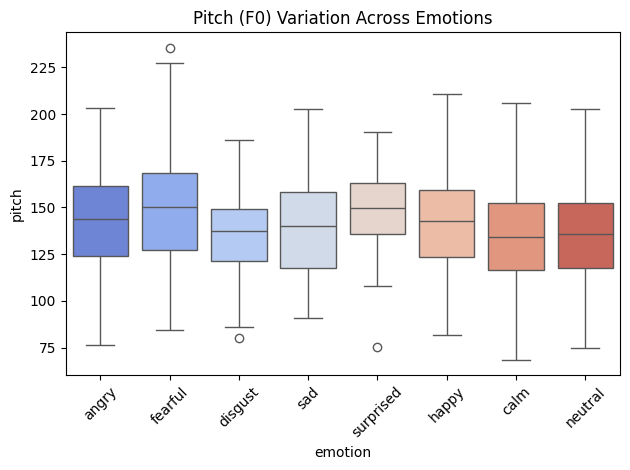

In [33]:
pitch_data = []

for path, label in zip(file_paths, emotions_list):
    try:
        y, sr = librosa.load(path, sr=None)
        f0 = librosa.yin(y, fmin=50, fmax=300).mean()  # You can also try median
        pitch_data.append((label, f0))
    except:
        continue

df_pitch = pd.DataFrame(pitch_data, columns=['emotion', 'pitch'])

sns.boxplot(data=df_pitch, x='emotion', y='pitch', palette='coolwarm')
plt.title("Pitch (F0) Variation Across Emotions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/g6/pn8l9d616gl87vwf5lxtp0nr0000gn/T/ipykernel_92756/3549361094.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_centroid, x='emotion', y='centroid', palette='Spectral')


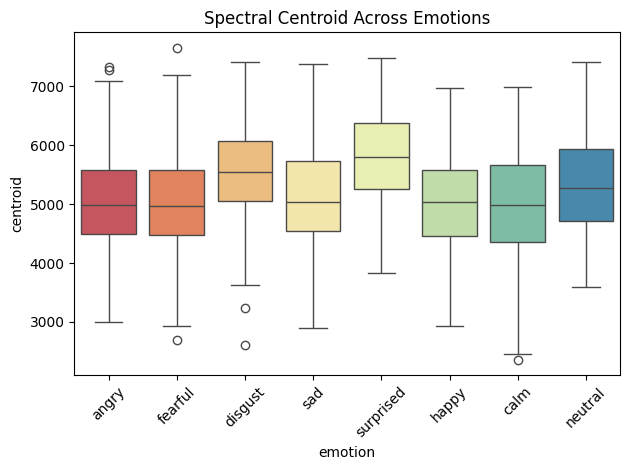

In [34]:
spec_centroid = []

for path, label in zip(file_paths, emotions_list):
    try:
        y, sr = librosa.load(path, sr=None)
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
        spec_centroid.append((label, centroid))
    except:
        continue

df_centroid = pd.DataFrame(spec_centroid, columns=['emotion', 'centroid'])

sns.boxplot(data=df_centroid, x='emotion', y='centroid', palette='Spectral')
plt.title("Spectral Centroid Across Emotions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/g6/pn8l9d616gl87vwf5lxtp0nr0000gn/T/ipykernel_92756/3927592181.py:7: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
/var/folders/g6/pn8l9d616gl87vwf5lxtp0nr0000gn/T/ipykernel_92756/3927592181.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tempo, x='emotion', y='tempo', palette='pastel')


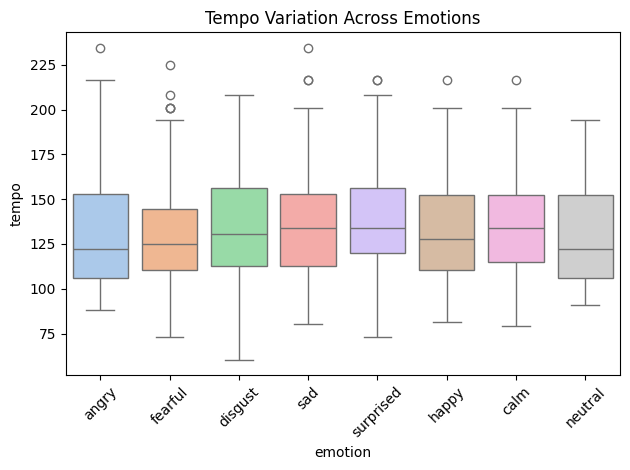

In [35]:
tempos = []

for path, label in zip(file_paths, emotions_list):
    try:
        y, sr = librosa.load(path, sr=None)
        onset_env = librosa.onset.onset_strength(y=y, sr=sr)
        tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
        tempos.append((label, tempo))
    except:
        continue

df_tempo = pd.DataFrame(tempos, columns=['emotion', 'tempo'])

sns.boxplot(data=df_tempo, x='emotion', y='tempo', palette='pastel')
plt.title("Tempo Variation Across Emotions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# ⚖️ Balance dataset
max_count = df['emotion'].value_counts().max()
df_balanced = pd.concat([
    resample(df[df.emotion == e], replace=True, n_samples=max_count, random_state=42)
    for e in df['emotion'].unique()
]).sample(frac=1, random_state=42)

print("Balanced Emotion Counts:\n", df_balanced["emotion"].value_counts())

Balanced Emotion Counts:
 emotion
fearful      376
calm         376
disgust      376
neutral      376
angry        376
happy        376
surprised    376
sad          376
Name: count, dtype: int64


In [23]:
def mfcc_values(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

def delta_values(filename):
    mfcc = mfcc_values(filename)
    return librosa.feature.delta(mfcc)

def log_mel_values(file_path, duration=3, offset=0.5, n_mels=128):
    y, sr = librosa.load(file_path, duration=duration, offset=offset)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    return np.mean(librosa.power_to_db(mel_spec).T, axis=0)

def zcr_values(file_name):
    sig, sr = librosa.load(file_name, duration=3, offset=0.5)
    return np.mean(librosa.feature.zero_crossing_rate(sig).T, axis=0)

def spectral_features(file_path, duration=3, offset=0.5):
    y, sr = librosa.load(file_path, duration=duration, offset=offset)
    centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    flatness = np.mean(librosa.feature.spectral_flatness(y=y))
    return np.hstack([centroid, bandwidth, rolloff, flatness, contrast])

def extract_features(file_name):
    return np.hstack([
        mfcc_values(file_name),
        delta_values(file_name),
        log_mel_values(file_name),
        zcr_values(file_name),
        spectral_features(file_name)
    ])

# 🧠 Feature Extraction Loop
features, labels = [], []

for i, row in df_balanced.iterrows():
    try:
        f = extract_features(row["file_path"])
        features.append(f)
        labels.append(row["emotion"])
    except Exception as e:
        print("Error processing:", row["file_path"], e)

X = np.array(features)
y = np.array(labels)


In [24]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 🌳 Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [25]:

# 📈 Evaluation
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Confusion Matrix:
 [[68  0  1  2  0  0  0  4]
 [ 0 68  1  0  1  3  2  0]
 [ 0  0 72  0  1  0  0  2]
 [ 1  0  2 64  1  0  6  2]
 [ 0  2  5  2 61  1  0  4]
 [ 0  4  0  0  0 71  0  0]
 [ 0  4  1  4  0  3 61  3]
 [ 0  2  1  0  0  0  0 72]]
Classification Report:
               precision    recall  f1-score   support

       angry       0.99      0.91      0.94        75
        calm       0.85      0.91      0.88        75
     disgust       0.87      0.96      0.91        75
     fearful       0.89      0.84      0.86        76
       happy       0.95      0.81      0.88        75
     neutral       0.91      0.95      0.93        75
         sad       0.88      0.80      0.84        76
   surprised       0.83      0.96      0.89        75

    accuracy                           0.89       602
   macro avg       0.90      0.89      0.89       602
weighted avg       0.90      0.89      0.89       602



In [26]:
# 💾 Save model and label encoder
os.makedirs("model", exist_ok=True)
joblib.dump(clf, "model/trained_model.pkl")
with open("model/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Model and LabelEncoder saved successfully.")
print("🎯 Classes:", le.classes_)


✅ Model and LabelEncoder saved successfully.
🎯 Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
